## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:
from keras.layers import Dropout


def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [24]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3

EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = 0.25
Dropout_EXPS = [0.25,0.3,0.35,0.4,0.45]

In [25]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for Dropout_EXP in Dropout_EXPS:
    exp_name_tag = "exp-Dropout_exp-%s" % str(Dropout_EXP)
    print("==",exp_name_tag,"==")
    
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=Dropout_EXP)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    l.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    
    

== exp-Dropout_exp-0.25 ==
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)         

50000/50000 [==============================] - 20s 398us/step - loss: 1.3003 - acc: 0.5361 - val_loss: 1.3144 - val_acc: 0.5320
Epoch 50/50
50000/50000 [==============================] - 20s 398us/step - loss: 1.2902 - acc: 0.5419 - val_loss: 1.3160 - val_acc: 0.5297
== exp-Dropout_exp-0.3 ==
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)      

50000/50000 [==============================] - 20s 399us/step - loss: 1.4315 - acc: 0.4881 - val_loss: 1.3736 - val_acc: 0.5077
Epoch 46/50
50000/50000 [==============================] - 20s 396us/step - loss: 1.4262 - acc: 0.4906 - val_loss: 1.3788 - val_acc: 0.5066
Epoch 47/50
50000/50000 [==============================] - 20s 404us/step - loss: 1.4247 - acc: 0.4913 - val_loss: 1.3722 - val_acc: 0.5102
Epoch 48/50
50000/50000 [==============================] - 20s 398us/step - loss: 1.4191 - acc: 0.4936 - val_loss: 1.3768 - val_acc: 0.5048
Epoch 49/50
50000/50000 [==============================] - 20s 399us/step - loss: 1.4133 - acc: 0.4958 - val_loss: 1.3697 - val_acc: 0.5040
Epoch 50/50
50000/50000 [==============================] - 20s 406us/step - loss: 1.4082 - acc: 0.4962 - val_loss: 1.3640 - val_acc: 0.5087
== exp-Dropout_exp-0.4 ==
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (Input

50000/50000 [==============================] - 20s 397us/step - loss: 1.5632 - acc: 0.4409 - val_loss: 1.4571 - val_acc: 0.4817
Epoch 42/50
50000/50000 [==============================] - 20s 398us/step - loss: 1.5599 - acc: 0.4405 - val_loss: 1.4500 - val_acc: 0.4823
Epoch 43/50
50000/50000 [==============================] - 20s 399us/step - loss: 1.5570 - acc: 0.4430 - val_loss: 1.4575 - val_acc: 0.4813
Epoch 44/50
50000/50000 [==============================] - 20s 405us/step - loss: 1.5526 - acc: 0.4454 - val_loss: 1.4529 - val_acc: 0.4826
Epoch 45/50
50000/50000 [==============================] - 20s 403us/step - loss: 1.5539 - acc: 0.4425 - val_loss: 1.4390 - val_acc: 0.4870
Epoch 46/50
50000/50000 [==============================] - 20s 402us/step - loss: 1.5436 - acc: 0.4479 - val_loss: 1.4439 - val_acc: 0.4824
Epoch 47/50
50000/50000 [==============================] - 20s 403us/step - loss: 1.5314 - acc: 0.4511 - val_loss: 1.4344 - val_acc: 0.4902
Epoch 48/50
50000/50000 [=======

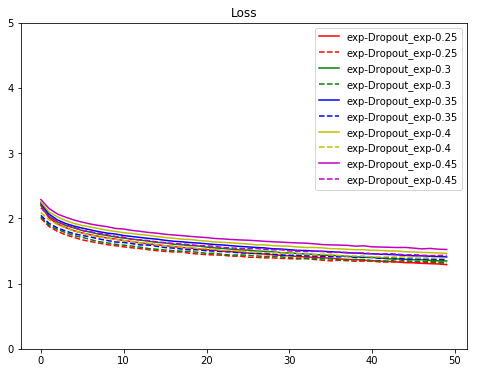

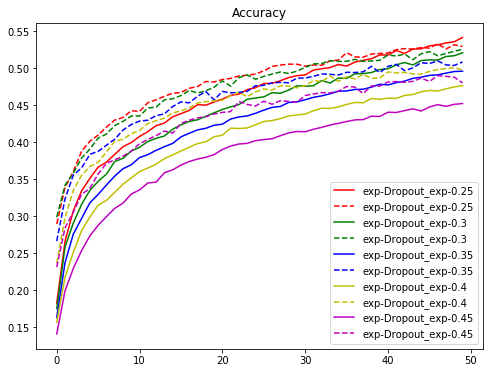

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [8]:
LEARNING_RATE = 1e-3

EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = 0.25
Dropout_EXPS = [0.15,0.2,0.25,0.3]

In [9]:
results_adam = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
print("optimizer=Adam")
for Dropout_EXP in Dropout_EXPS:
    exp_name_tag = "exp-Dropout_exp-%s" % str(Dropout_EXP)
    print("==",exp_name_tag,"==")
    
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=Dropout_EXP)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    
    results_adam[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

optimizer=Adam
== exp-Dropout_exp-0.15 ==
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None

Epoch 49/50
50000/50000 [==============================] - 22s 438us/step - loss: 1.2822 - acc: 0.5376 - val_loss: 1.3573 - val_acc: 0.5155
Epoch 50/50
50000/50000 [==============================] - 23s 452us/step - loss: 1.2835 - acc: 0.5385 - val_loss: 1.3618 - val_acc: 0.5193
== exp-Dropout_exp-0.2 ==
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_5 (Dropout)          (None

50000/50000 [==============================] - 20s 407us/step - loss: 1.4064 - acc: 0.4949 - val_loss: 1.3820 - val_acc: 0.5084
Epoch 48/50
50000/50000 [==============================] - 20s 409us/step - loss: 1.4047 - acc: 0.4959 - val_loss: 1.4171 - val_acc: 0.4960
Epoch 49/50
50000/50000 [==============================] - 20s 400us/step - loss: 1.4036 - acc: 0.4956 - val_loss: 1.4015 - val_acc: 0.5020
Epoch 50/50
50000/50000 [==============================] - 20s 401us/step - loss: 1.3974 - acc: 0.4963 - val_loss: 1.3958 - val_acc: 0.5041
== exp-Dropout_exp-0.25 ==
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_7 (Dropout)          

Epoch 45/50
50000/50000 [==============================] - 41s 824us/step - loss: 1.4707 - acc: 0.4703 - val_loss: 1.5124 - val_acc: 0.4704
Epoch 46/50
50000/50000 [==============================] - 38s 763us/step - loss: 1.4727 - acc: 0.4699 - val_loss: 1.4646 - val_acc: 0.4835
Epoch 47/50
50000/50000 [==============================] - 38s 756us/step - loss: 1.4679 - acc: 0.4744 - val_loss: 1.4469 - val_acc: 0.4877
Epoch 48/50
50000/50000 [==============================] - 47s 943us/step - loss: 1.4671 - acc: 0.4737 - val_loss: 1.4272 - val_acc: 0.4878
Epoch 49/50
50000/50000 [==============================] - 45s 891us/step - loss: 1.4638 - acc: 0.4741 - val_loss: 1.4276 - val_acc: 0.4920
Epoch 50/50
50000/50000 [==============================] - 40s 803us/step - loss: 1.4545 - acc: 0.4758 - val_loss: 1.4325 - val_acc: 0.4995
== exp-Dropout_exp-0.3 ==
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
in

50000/50000 [==============================] - 36s 718us/step - loss: 1.6018 - acc: 0.4238 - val_loss: 1.5566 - val_acc: 0.4584
Epoch 43/50
50000/50000 [==============================] - 37s 747us/step - loss: 1.5998 - acc: 0.4228 - val_loss: 1.5612 - val_acc: 0.4529
Epoch 44/50
50000/50000 [==============================] - 36s 723us/step - loss: 1.5932 - acc: 0.4243 - val_loss: 1.5351 - val_acc: 0.4614
Epoch 45/50
50000/50000 [==============================] - 36s 719us/step - loss: 1.5931 - acc: 0.4251 - val_loss: 1.5352 - val_acc: 0.4588
Epoch 46/50
50000/50000 [==============================] - 38s 764us/step - loss: 1.5993 - acc: 0.4224 - val_loss: 1.5558 - val_acc: 0.4558
Epoch 47/50
50000/50000 [==============================] - 38s 754us/step - loss: 1.5963 - acc: 0.4238 - val_loss: 1.5237 - val_acc: 0.4582
Epoch 48/50
50000/50000 [==============================] - 38s 769us/step - loss: 1.5891 - acc: 0.4283 - val_loss: 1.5445 - val_acc: 0.4465 1.5890 - - ETA: 2s - loss: 1.590

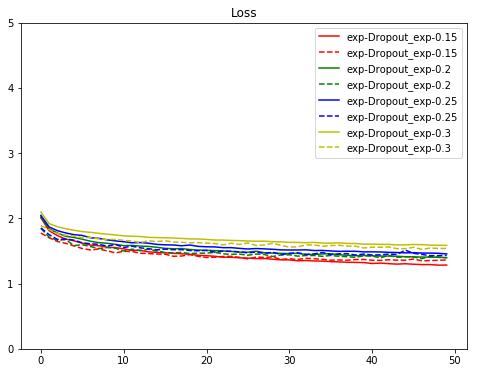

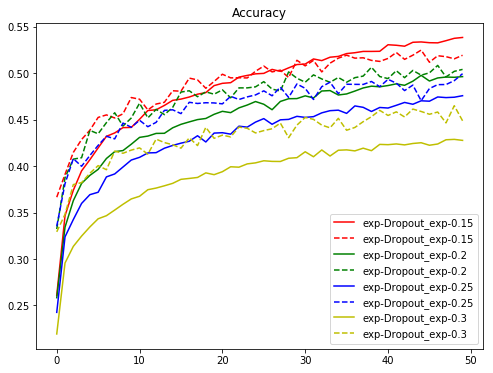

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_adam.keys()):
    plt.plot(range(len(results_adam[cond]['train-loss'])),results_adam[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_adam[cond]['valid-loss'])),results_adam[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_adam.keys()):
    plt.plot(range(len(results_adam[cond]['train-acc'])),results_adam[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_adam[cond]['valid-acc'])),results_adam[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()